In [2]:
# DISCLAIMER: I did not do all of this code :P 
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets, decomposition, preprocessing, model_selection
from keras import models, layers, activations, losses, optimizers, metrics
from keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix


Init Plugin
Init Graph Optimizer
Init Kernel


In [3]:
df = pd.read_csv('creditcard.csv.gz')

In [4]:

x = df[df.columns[1:30]].to_numpy()
y = df[df.columns[30]].to_numpy()

df = pd.concat([pd.DataFrame(x), pd.DataFrame({'anomaly': y})], axis=1)
normal_events = df[df['anomaly'] == 0]
abnormal_events = df[df['anomaly'] == 1]

In [5]:
normal_events = normal_events.loc[:, normal_events.columns != 'anomaly']
abnormal_events = abnormal_events.loc[:, abnormal_events.columns != 'anomaly']

# scaling
scaler = preprocessing.MinMaxScaler()
scaler.fit(df.drop('anomaly', 1))

scaled_data = scaler.transform(normal_events)

In [6]:
# 80% percent of dataset is designated to training
train_data, test_data = model_selection.train_test_split(scaled_data, test_size=0.7)

n_features = x.shape[1]
print(n_features)
print(train_data)

29
[[9.44921710e-01 7.58037229e-01 8.46061661e-01 ... 4.14864361e-01
  3.15267666e-01 3.89238944e-04]
 [9.87019808e-01 7.63521312e-01 8.60994296e-01 ... 4.18080588e-01
  3.12858212e-01 1.47638332e-03]
 [9.51480862e-01 7.73102367e-01 8.66475101e-01 ... 4.12205203e-01
  3.07404222e-01 1.40126020e-03]
 ...
 [9.78933064e-01 7.70839628e-01 8.43237087e-01 ... 4.16073110e-01
  3.13561041e-01 5.02118238e-05]
 [9.79626651e-01 7.73015787e-01 8.38005182e-01 ... 4.16429941e-01
  3.13430741e-01 3.46422661e-05]
 [9.46068957e-01 7.77622057e-01 8.63087096e-01 ... 4.22714276e-01
  3.17043514e-01 9.11597608e-04]]


In [7]:
# model
encoder = models.Sequential(name='encoder')
encoder.add(
    layer=layers.Dense(
        units=29, 
        activation=activations.relu, 
        input_shape=[n_features]
    )
)

encoder.add(
    layer=layers.Dense(
        units=20, 
        activation=activations.relu, 
        input_shape=[n_features]
    )
)
encoder.add(layers.Dropout(0.1))
encoder.add(layer=layers.Dense(units=10, activation=activations.relu))
encoder.add(layer=layers.Dense(units=5, activation=activations.relu))

decoder = models.Sequential(name='decoder')
decoder.add(
    layer=layers.Dense(
        units=10, 
        activation=activations.relu, 
        input_shape=[5]
    )
)
decoder.add(layer=layers.Dense(units=20, activation=activations.relu))
decoder.add(layers.Dropout(0.1))
decoder.add(layer=layers.Dense(units=n_features, activation=activations.sigmoid))

autoencoder = models.Sequential([encoder, decoder])

autoencoder.compile(
    loss='mse',
    optimizer='adam',
    metrics=[metrics.mean_squared_error]
)

Metal device set to: Apple M1


2021-10-14 21:38:23.916549: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-10-14 21:38:23.920311: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2021-10-14 21:38:39.451434: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-10-14 21:38:39.484240: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2021-10-14 21:38:53.914407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2396/2399 [============================>.] - ETA: 0s - loss: 0.0069 - mean_squared_error: 0.0069

2021-10-14 21:39:16.005250: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2399/2399 [==============================] - 37s 9ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 2/10
2399/2399 [==============================] - 26s 11ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 3/10
2399/2399 [==============================] - 21s 9ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 4/10
2399/2399 [==============================] - 22s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 5/10
2399/2399 [==============================] - 22s 9ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 6/10
2399/2399 [==============================] - 21s 9ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 9.9378e-04 - val_mean_squared_error: 9.9378e-04
Epoch 7/10
2

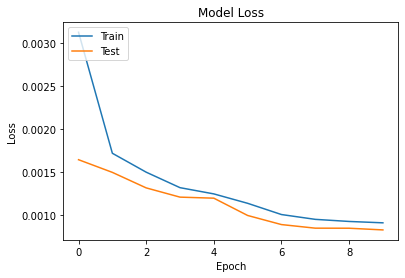

In [8]:
# train model
es = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.00001, 
    patience=20, 
    restore_best_weights=True
)

history = autoencoder.fit(
    x=train_data, 
    y=train_data, 
    epochs=10, 
    verbose=1, 
    validation_split=0.1, 
    callbacks=[es]
) # validation_data=(test_data, test_data)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [9]:
train_predicted_x = autoencoder.predict(x=train_data)
train_events_mse = losses.mean_squared_error(train_data, train_predicted_x)
cut_off = np.percentile(train_events_mse, 99)
print('cut_off:', cut_off)
# cut_off: 0.0013734778214711686

2021-10-14 21:42:34.381299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


cut_off: 0.003514755710493769


In [10]:
#####
plot_samples = 10000
# normal event
real_x = test_data[:plot_samples].reshape(plot_samples, n_features)
predicted_n_x = autoencoder.predict(x=real_x)
normal_events_mse = losses.mean_squared_error(real_x, predicted_n_x)
normal_events_df = pd.DataFrame(
    {
        'mse': normal_events_mse,
        'n': np.arange(0, plot_samples),
        'anomaly': np.zeros(plot_samples)
    }
)

In [11]:
# abnormal event
plot_samples_ab = len(abnormal_events)
abnormal_x = scaler.transform(abnormal_events)[:plot_samples_ab].reshape(plot_samples_ab, n_features)
predicted_ab_x = autoencoder.predict(x=abnormal_x)
abnormal_events_mse = losses.mean_squared_error(abnormal_x, predicted_ab_x)
abnormal_events_df = pd.DataFrame(
    {
        'mse': abnormal_events_mse,
        'n': np.arange(0, plot_samples_ab),
        'anomaly': np.ones(plot_samples_ab)
    }
)

Text(0.5, 1.0, 'Threshlold: 0.003514755710493769')

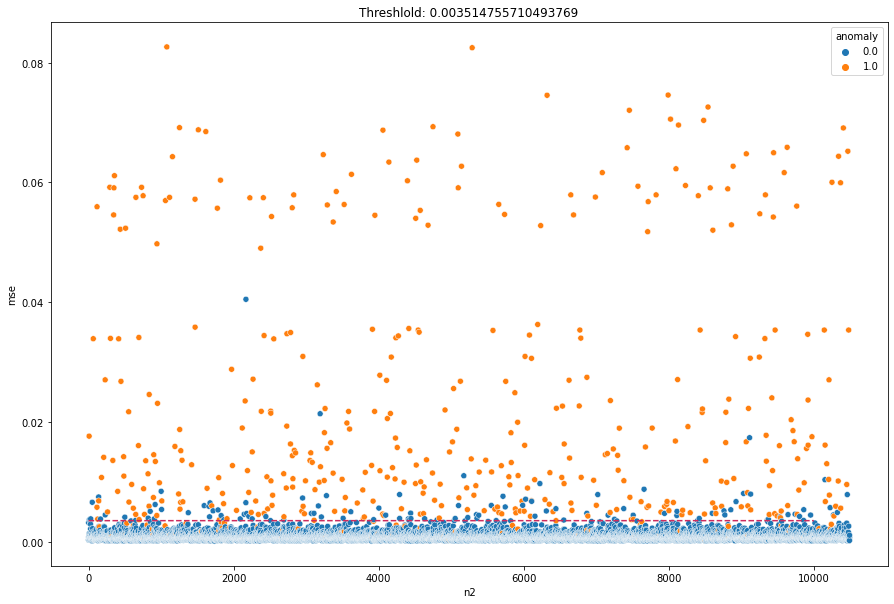

In [12]:

plt.figure(figsize=(15, 10))
mse_df = pd.concat([normal_events_df, abnormal_events_df]).sample(frac=1)
mse_df['n2'] = np.arange(0, len(mse_df))
plot = sns.scatterplot(x=mse_df.n2, y=mse_df.mse, hue=mse_df.anomaly)

line = lines.Line2D(
    xdata=np.arange(0, plot_samples),
    ydata=np.full(plot_samples, cut_off),
    color='#CC2B5E',
    linewidth=1.5,
    linestyle='dashed'
)

plot.add_artist(line)
plt.title('Threshlold: {threshold}'.format(threshold=cut_off))

[Text(0, 0.5, 'Normal'), Text(0, 1.5, 'Fraud')]

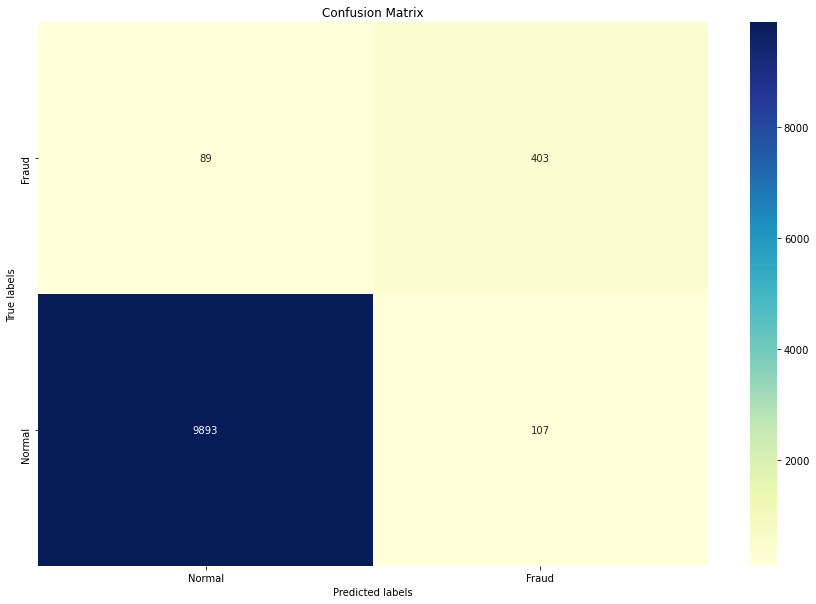

In [13]:
#Set an error threshold above which a transaction is considered fraud
threshold = cut_off
mse_df['pred_01'] = [1 if e > threshold else 0 for e in mse_df['mse'].values]
conf_mat = confusion_matrix(mse_df['anomaly'], mse_df['pred_01'])
plt.figure(figsize=(15,10))
#Print confusion matrix for the given threshold
ax= plt.subplot()
sns.heatmap(conf_mat, annot=True, fmt="g", cmap="YlGnBu")
 
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.set_ylim([0,2])
ax.xaxis.set_ticklabels(["Normal", "Fraud"])
ax.yaxis.set_ticklabels(["Normal", "Fraud"])